# Imports

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creating reduced version of the original data set

In [140]:
original_dataset = pd.read_csv('TADPOLE_D1_D2.csv')
reduced_dataset = original_dataset[['PTID', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'DX_bl']]

# Removing rows with incomplete data

In [141]:
print(reduced_dataset.info())
# Removing all rows with incomplete data and resetting indexes
reduced_dataset = reduced_dataset.dropna()
reduced_dataset = reduced_dataset.reset_index(drop=True)
print(reduced_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 17 columns):
PTID               12741 non-null object
AGE                12741 non-null float64
PTGENDER           12741 non-null object
PTEDUCAT           12741 non-null int64
PTRACCAT           12741 non-null object
APOE4              12729 non-null float64
FDG                3352 non-null float64
AV45               2118 non-null float64
CDRSB              8963 non-null float64
ADAS11             8910 non-null float64
MMSE               8932 non-null float64
RAVLT_immediate    8831 non-null float64
Hippocampus        6802 non-null float64
WholeBrain         7689 non-null float64
Entorhinal         6469 non-null float64
MidTemp            6469 non-null float64
DX_bl              12741 non-null object
dtypes: float64(12), int64(1), object(4)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 17 columns):
PTID              

# Removing irrelevant features (*columns*)

In [142]:
# Counts of each value in PTRACCAT attribute
reduced_dataset['PTRACCAT'].value_counts()

White                1046
Black                  36
More than one          16
Asian                  15
Unknown                 3
Hawaiian/Other PI       3
Am Indian/Alaskan       2
Name: PTRACCAT, dtype: int64

In [143]:
# Removing redundant columns
reduced_dataset = reduced_dataset.drop(['PTRACCAT','PTID'], axis=1)

In [144]:
print(reduced_dataset)

       AGE PTGENDER  PTEDUCAT  APOE4       FDG      AV45  CDRSB  ADAS11  MMSE  \
0     71.7     Male        14    0.0  1.472450  1.128200    0.0     5.0  28.0   
1     72.8     Male        18    0.0  1.045950  1.000870    5.0    20.0  23.0   
2     69.6   Female        13    0.0  1.415650  0.964111    0.0     4.0  28.0   
3     70.9   Female        13    0.0  1.401800  0.998996    0.0     7.0  27.0   
4     72.9     Male        16    0.0  1.320800  0.986278    0.0     8.0  30.0   
...    ...      ...       ...    ...       ...       ...    ...     ...   ...   
1116  80.4   Female        12    0.0  1.294850  1.048590    0.5     7.0  30.0   
1117  70.5   Female        14    0.0  1.270410  1.148170    0.0     3.0  28.0   
1118  70.8   Female        18    0.0  1.327970  1.101030    0.0     1.0  30.0   
1119  61.1   Female        13    1.0  1.223190  1.156280    2.5     9.0  26.0   
1120  66.8     Male        12    2.0  0.894332  1.680250    3.0    16.0  16.0   

      RAVLT_immediate  Hipp

# Encoding data

In [145]:
# Encoding PTGENDER attribute 
reduced_dataset = pd.get_dummies(reduced_dataset, columns=['PTGENDER'])

In [146]:
# Reordering dataframe columns
reduced_dataset = reduced_dataset[['AGE', 'PTGENDER_Male','PTGENDER_Female', 'PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'DX_bl']]
print(reduced_dataset)

       AGE  PTGENDER_Male  PTGENDER_Female  PTEDUCAT  APOE4       FDG  \
0     71.7              1                0        14    0.0  1.472450   
1     72.8              1                0        18    0.0  1.045950   
2     69.6              0                1        13    0.0  1.415650   
3     70.9              0                1        13    0.0  1.401800   
4     72.9              1                0        16    0.0  1.320800   
...    ...            ...              ...       ...    ...       ...   
1116  80.4              0                1        12    0.0  1.294850   
1117  70.5              0                1        14    0.0  1.270410   
1118  70.8              0                1        18    0.0  1.327970   
1119  61.1              0                1        13    1.0  1.223190   
1120  66.8              1                0        12    2.0  0.894332   

          AV45  CDRSB  ADAS11  MMSE  RAVLT_immediate  Hippocampus  WholeBrain  \
0     1.128200    0.0     5.0  28.0       

In [147]:
# Encoding dictionary for DX_bl 
DX_bl = {'CN':1, 'EMCI':2, 'LMCI':3, 'SMC':4, 'AD':5}
reduced_dataset['DX_bl'] = reduced_dataset.DX_bl.map(DX_bl)

In [148]:
print(reduced_dataset)
print(reduced_dataset.info())

       AGE  PTGENDER_Male  PTGENDER_Female  PTEDUCAT  APOE4       FDG  \
0     71.7              1                0        14    0.0  1.472450   
1     72.8              1                0        18    0.0  1.045950   
2     69.6              0                1        13    0.0  1.415650   
3     70.9              0                1        13    0.0  1.401800   
4     72.9              1                0        16    0.0  1.320800   
...    ...            ...              ...       ...    ...       ...   
1116  80.4              0                1        12    0.0  1.294850   
1117  70.5              0                1        14    0.0  1.270410   
1118  70.8              0                1        18    0.0  1.327970   
1119  61.1              0                1        13    1.0  1.223190   
1120  66.8              1                0        12    2.0  0.894332   

          AV45  CDRSB  ADAS11  MMSE  RAVLT_immediate  Hippocampus  WholeBrain  \
0     1.128200    0.0     5.0  28.0       

# Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [149]:
# Creating upper triangular matrix with 1 that will serve as mask for heat map
mask = np.zeros_like(reduced_dataset.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

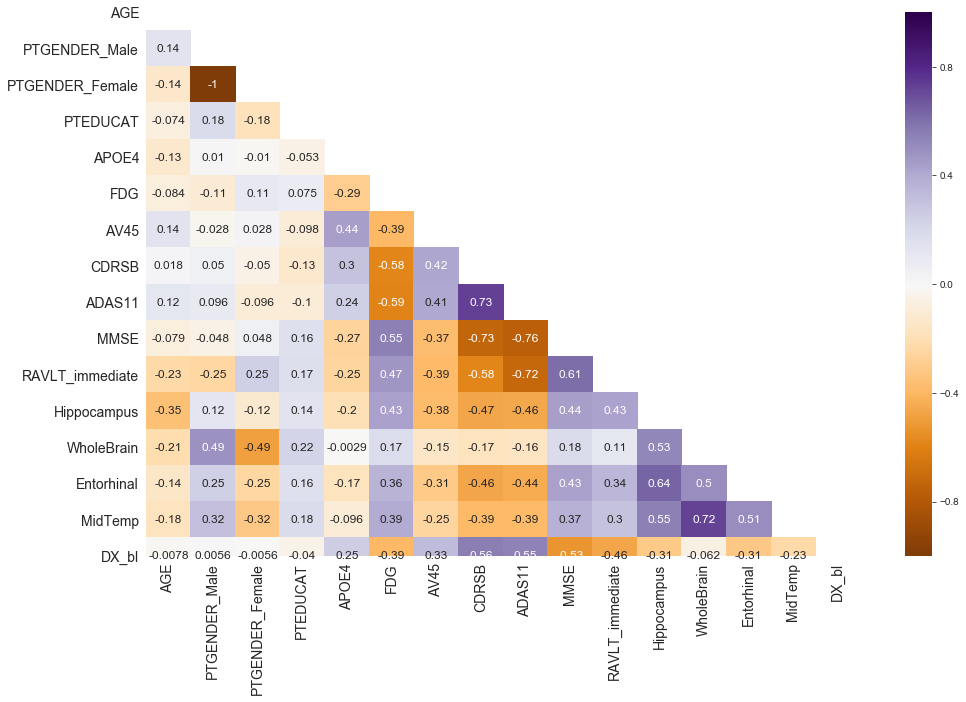

In [150]:
# Plotting heat map of linear correlation
plt.figure(figsize=(16,10))
sns.heatmap(reduced_dataset.corr(),mask=mask, cmap='PuOr', annot=True, annot_kws={'size':12})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

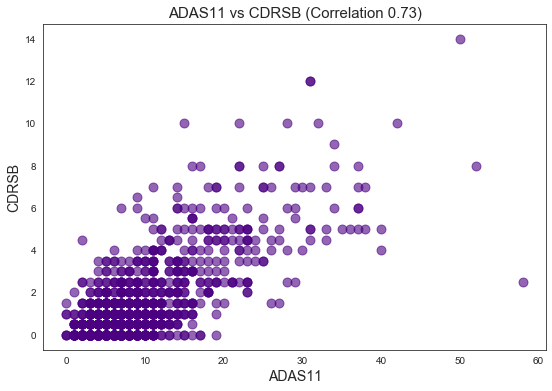

In [151]:
# Mutual scatter plot for ADAS11 and CDRSB
ADAS11_CDRSB_cor = round(reduced_dataset['ADAS11'].corr(reduced_dataset['CDRSB']),3)
plt.figure(figsize=(9,6))
plt.title(f'ADAS11 vs CDRSB (Correlation {ADAS11_CDRSB_cor})', fontsize=15)
plt.scatter(reduced_dataset['ADAS11'], reduced_dataset['CDRSB'], alpha=0.6, s=80, color='indigo')
plt.xlabel('ADAS11', fontsize=14)
plt.ylabel('CDRSB', fontsize=14)
plt.show()

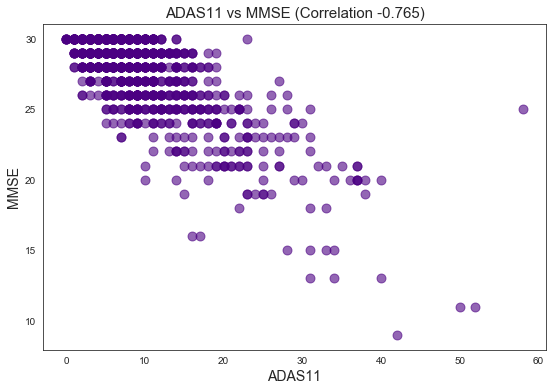

In [152]:
# Mutual scatter plot for ADAS11 and MMSE
ADAS11_MMSE_cor = round(reduced_dataset['ADAS11'].corr(reduced_dataset['MMSE']),3)
plt.figure(figsize=(9,6))
plt.title(f'ADAS11 vs MMSE (Correlation {ADAS11_MMSE_cor})', fontsize=15)
plt.scatter(reduced_dataset['ADAS11'], reduced_dataset['MMSE'], alpha=0.6, s=80, color='indigo')
plt.xlabel('ADAS11', fontsize=14)
plt.ylabel('MMSE', fontsize=14)
plt.show()

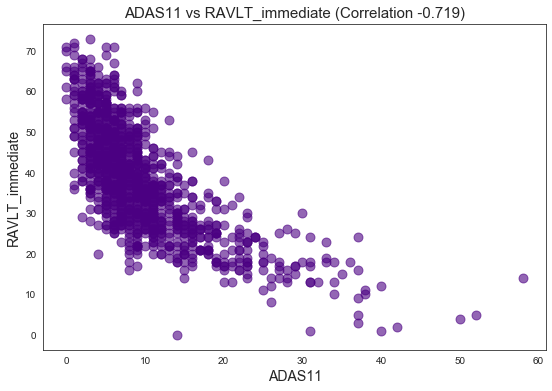

In [153]:
# Mutual scatter plot for ADAS11 and RAVLT_immediate
ADAS11_RAVLT_cor = round(reduced_dataset['ADAS11'].corr(reduced_dataset['RAVLT_immediate']),3)
plt.figure(figsize=(9,6))
plt.title(f'ADAS11 vs RAVLT_immediate (Correlation {ADAS11_RAVLT_cor})', fontsize=15)
plt.scatter(reduced_dataset['ADAS11'], reduced_dataset['RAVLT_immediate'], alpha=0.6, s=80, color='indigo')
plt.xlabel('ADAS11', fontsize=14)
plt.ylabel('RAVLT_immediate', fontsize=14)
plt.show()

In [154]:
# Removing the ADAS11 column from the dataset
reduced_dataset = reduced_dataset.drop('ADAS11', axis=1)

In [155]:
# Saving the dataset for later usage
reduced_dataset.to_csv('preprocessed_data.csv')